<a href="https://colab.research.google.com/github/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/BIG_T8_Modelos_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **8. Redes Neurais e Deep Learning**
---

Nesta trilha você vai aprender:

*  O que são e como funcionam modelos de redes neurais multicamada supervisionados
*  No que se diferenciam os frameworks de redes neurais profundas como o `Keras/TensorFlow` e o `PyTorch`
*  Como implementar um modelo sequencial simples de classificação binária com o Keras/TensorFlow

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

Nesta trilha vamos apresentar os principais conceitos dos modelos neurais começando pela definição de um neurônio artificial, o modelo perceptron e seu aprendizado e vamos entender como esses elementos simples podem ser combinados para construirmos poderosas *redes neurais*.

Antes de entrarmos na estrutura desse modelo, vale a pena você conhecer um pouco da evolução desses modelos. Os modelos neurais não são novos, mas sua evolução passa por altos e baixos e é importante que você compreenda como chegamos aqui e no entusiasmo que cerca as redes profundas hoje.

Você vai conhecer o modelo de artificial de neurônio chamado **perceptron**. Criado nos anos 40 esse ainda é o modelo empregado pela maior parte das redes neurais, incluindo as redes *deep learning* em `TensorFlow`, `PyTorch` etc. 
E irá entender o que são as **funções de ativação** e como se dá o **aprendizado do perceptron**.

Esses modelos simples de neurônios podem então ser combinados para formarem redes de perceptrons que podem, então, resolverem problemas dos mais complexos. Essas redes, redes neurais multicamada, **feed-forward** ou **MLP Multilayer Perceptron** exigem técnicas mais elaboradas de aprendizado que o neurônio simples e você vai poder conhecer e explorar aqui um pouco da técnica da **retropagação do erro**, ou **backpropagation**. 

Em seguida vamos explorar um pouco dos frameworks de Deepd Learning e no que eles se diferenciam de implementar um modelo neural, por exemplo, com o `scikit-learn`. Você ainda irá implementar um modelo simples de Classificação com o Keras/TensorFlow.



# Evolução dos Modelos Neurais

Redes neurais artificiais não são um conceito novo. Inspirados no modelo de um neurônio biológico, Walter Pitts e Warren McCulloch mostraram em 1943 que unidades lógicas com thresholds, thresholded logic unit (que produzem disparo, são ativados ou enviam um sinal), poderiam ser combinadas para para produzir uma máquina de Turing usando portas lógicas de AND, OR e NOT. 

Esse modelo, entretanto, ainda não mostrava a possibilidade de aprendizado. Foi só em 1949, que o psicólogo Donald Hebb descreveu alguns dos princípios aprendizado neural, mostrando como o aprendizado poderia ocorrer reforçando as conexões neurais. Esse princípio abriu então as portas para o aprendizado dos neurônios artificiais. 


## Modelo de Neurônio Artificial

Sobre o trabalho de McCulloch-Pitts, o psicólogo Frank Rosenblatt concebeu em 1957 o Perceptron, um modelo matemático bastante simplificado de um neurônio biológico. Esse modelo é basicamente o mesmo empregado até hoje nos modelos neurais e mesmo redes neurais profundas.

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_perceptron.png" width=500, align="center">
<br>
<small>
<figcaption><b>Figura 1. Modelo Perceptron de Neurônio Artificial.</b></figcaption>
</figure>

No modelo de Rosenblatt as entradas, que podem vir de outros neurônio ou sensores, são ponderadas pelos pesos como uma combinação linear. Note que há um termo independente que faz o papel do termo independente na expressão linear. Essa somatória é, no modelo de Rosenblatt, submetida a uma função threshold, ou função limiar, que faz o papel de disparo do neurônico biológico.

Esse modelo, em uma época em que se pensava que seria suficiente computar operadores lógicos que para se produzir inteligência artificial foi um marco.

O modelo, entretanto, ainda não tinha um mecanismo de aprendizado, o que era crucial para um modelo de Inteligência Artificial. Rosenblatt encontrou, na teoria do aprendizado Hebbiano, o que princípio que faltava para criar um mecanismo de aprendizado para os neurônios artificiais.


## Aprendizado do Neurônio Artificial

No Perceptron, os pesos nas entradas do neurônio permitiram um esquema de aprendizagem bastante simples e intuitivo: dado um conjunto de treinamento de exemplos de entrada-saída (uma função), o Perceptron deveria aprender a função a partir do ajuste dos pesos das entradas. Para cada elemento do conjunto de treinamento, o Perceptron aumentaria os pesos se a saída do Perceptron para a entrada fosse muito baixa em comparação à saída desse elemento, e diminuiria os pesos se a saída fosse muito alta. Mais formalmente o algoritmo seria:



In [ ]:
%%script false

1.	Comece com um Perceptron com pesos arbitrários e um conjunto de treinamento
2.	Para cada entrada do conjunto de treinamento, calcule a saída do Perceptron
3.	Se a saída do Perceptron é diferente da saída conhecida, então: 
4.	Se a saída é maior, diminua os pesos
5.	Se a saída é menor, aumente os pesos 
6.	Vá para o próximo elemento e repita 2-4 até o Perceptron não cometer mais erros 



Essa é uma ideia bastante simples. mas bastante influente de como se dá o aprendizado e, até hoje, o aprendizado se dá basicamente desse modo, mesmo nas redes profundas mais complexas. 

## Os Anos Perdidos: XOR 

Marvin Minsky e Seymour Papert (MIT Labs) já eram conhecidos e influentes cientistas quando publicaram em 1969 um trabalho criticando duramente a abordagem dos Perceptrons. Eles mostraram que um Perceptron com o seu mecanismo de aprendizado só poderia resolver problemas linearmente separáveis e que, por exemplo, não seriam capazes de aprender uma simples função booleana XOR por ser não linearmente separável. Esse trabalho, vindo de pesquisadores influentes, teve tanto impacto na comunidade científica provocando um retrocesso na pesquisa de modelos neurais, inibindo pesquisas e investimentos na área ao longo de mais de dez anos.  

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_XOR2.png" width=500, align="center">
<br>
<br>
<small>
<figcaption><b>Figura 2. Funções AND, OR e XOR. Um único neurônio não pode mapear a função XOR, não linearmente separável.</b></figcaption>
</figure>

## O Retorno: Backpropagation 

A ideia de se conectar perceptrons, em que um neurônio receberia como entrada a saída de outro neurônio artificial, não era estranha aos pesquisadores e parecia mesmo natural se pensarmos no modelo biológico. Entretanto, a regra do aprendizado do perceptron não podia ser aplicada.

Foi somente no final da década de 80 que alguns pesquisadores Geoff Hinton, Rumelhart e Williams mostraram que os perceptrons organizados em camadas, formando redes neurais, poderiam ser treinados por um procedimento relativamente simples. Isso abria novamente as portas para os modelos neurais, já que a adição de camadas permitia agora o aprendizado de funções também não lineares. Mas tarde ainda, Kurt Hornik, demonstraria (Teorema da Aproximação Universal, 1991) que redes multicamada feed-forward são aproximadores universais. Daí para frente, se abria uma nova onda de pesquisas e investimentos em modelos neurais. 

>>> *Kurt Hornik, demonstraria (Teorema da Aproximação Universal, 1991) que redes multicamada feed-forward são aproximadores universais. Esse é um resultado poderoso pois, dada uma função qualquer (um conjunto de treinamento), o teorema dava a garantia de que existiria uma rede neural capaz de aproximar essa função.*

O algoritmo funciona tomando a derivada da função de erro da rede e retornando esse valor para atualizar os pesos dos neurônios nas camadas anteriores, de onde o nome backpropagation ou algoritmo de retropropagação. Você aprenderá mais sobre isso adiante. 



## SVM, novo eclipse

O cálculo de derivadas é computacionalmente bastante custoso e, nos anos 90, os recursos computacionais ainda eram bastante limitados comparado ao que você conhece hoje. Havia a certeza de que haveria uma rede de neurônios capaz de resolver o problema, mas em geral, estávamos bastante limitados pois não era viável construir redes com muitos elementos ou muitas camadas. 

Não obstante essas limitações o aprendizado de máquina, tanto de modelos neurais como de outros modelos mais tradicionais, já era uma realidade e competiam entre si. Baseado no aprendizado estatístico Vapnik (AT&T Bell Laboratories) e outros pesquisadores criam nos anos 90s um modelo conhecido como SVM (Support Vector Machines). As máquinas de vetores de suporte passam a suplantar muitos modelos de aprendizado em muitas tarefas, e são muito eficientes no treinamento, e passam a concentrar os investimentos e a pesquisa em IA diante da frustração de se treinar grandes modelos neurais.   

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_history.png" width=900, align="center">
<br>
<br>
<figcaption><b>Figura 3. Timeline das Redes Neurais. <br></b>(Fonte: originalmente em Deep Learning 101 - Part 1: History and Background 
https://www.programmersought.com/article/54453361399/)</figcaption>
</figure>


## Deep Learning, Novo Retorno

Somente nos anos 2000, Geoff Hinton (Google, o mesmo que havia desenvolvido o backpropagation!), Yann Lecun (FaceBook), Yoshua Bengio e Jürgen Schmidhuber introduziram grandes avanços no aprendizado de redes neurais introduzindo o pré-aprendizado (Hinton), redes convolucionais (Lecun) e redes recorrentes possibilitando o que hoje conhecemos como Deep Learning, ou Redes Neurais Profundas.

Essas técnicas também se beneficiam hoje de maior capacidade computacional proporcionada pelo uso de computação em nuvem, avanços da tecnologia, uso de GPUs e vêm se popularizando e se industrializando a partir de soluções de software livre como o Keras/TensorFlow (Google), o PyTorch (FaceBook), o MXNet (Apache) e o CNTK (Microsoft) para desenvolvimento, e soluções em nuvem como a de grandes provedores como a Amazon AWS, Google Cloud e Azure.   


## Neurônio Artificial: Perceptron
 
Um neurônio artificial nada mais é do que um artefato de software que faz uma combinação linear das entradas e aplica uma **função de ativação** como a função $sign$, $tanh$ ou $relu$ para produzir uma saída.

$$ f(X) = sign( w_0 + w_1 x_1 + ... + w_n x_n ) $$

O treinamento do neurônio é feito ajustando-se os pesos $w_n$ de acordo com o erro de predição obtido para se estimar a saída $f(X) \cong y$.

$$ \min_{W} \sum || f(X)- y || $$

Você pode, então, entender o aprendizado de um neurônio como um **problema de otimização**.


# Funções de Ativação
Quaisquer combinações de operadores lineares são também lineares. Desse modo, sem uma função de ativação, as redes neurais somente poderiam solucionar problemas linearmente separáveis e seriam, portanto, equivalentes a um modelo de regressão linear. As funções de ativação são uma escolha importante na arquitetura de uma rede neural, pois facilitam a modelagem de relações mais complexas e são, ao final, elas que permitem que uma rede neural seja um aproximador universal de funções.

$$ f(x) = \frac{1}{(1 + e^{-x})} \quad \textrm{, Logistic } $$ 

$$ f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}\quad \textrm{, Tanh} $$ 

$$ f(x) = max(0,x) \quad \textrm{, ReLu} $$ 

$$ f(x) = log(1 + e^{x}) \quad \textrm{, Softplus} $$ 

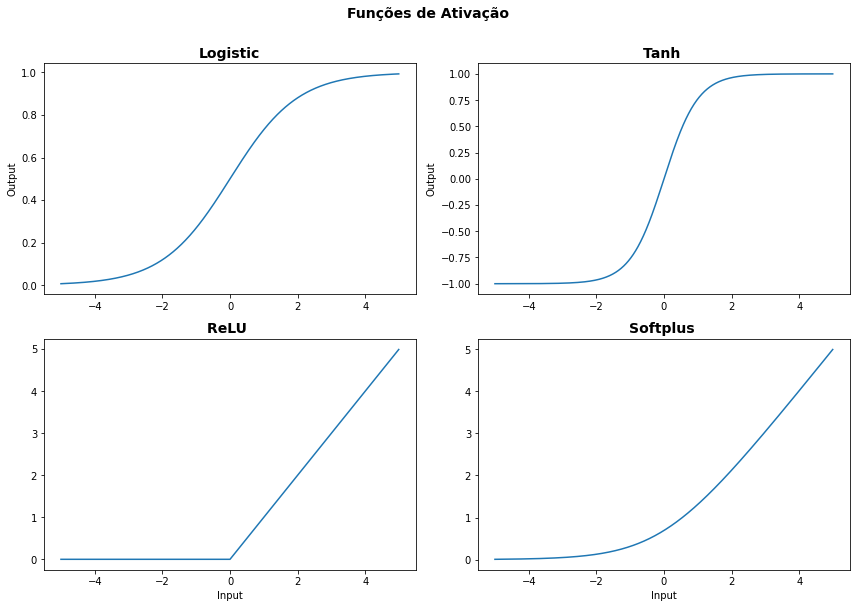

In [ ]:
# you can skip this code!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.suptitle('Funções de Ativação', fontsize=14, weight='bold', y=1.05)

x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))
plt.subplot(2,2,1)
plt.plot(x,y)
plt.title('Logistic', fontsize=14, weight='bold')
# plt.xlabel('Input')
plt.ylabel('Output')

y = np.tanh(x)
plt.subplot(2,2,2)
plt.plot(x,y)
plt.title('Tanh ', fontsize=14, weight='bold')
# plt.xlabel('Input')
plt.ylabel('Output')

z = np.zeros(len(x))
y = np.maximum(z,x)
plt.subplot(2,2,3)
plt.plot(x,y)
plt.title('ReLU ', fontsize=14, weight='bold')
plt.xlabel('Input')
# plt.ylabel('Output');

y = np.log(1+np.exp(x))
plt.subplot(2,2,4)
plt.plot(x,y)
plt.title('Softplus ', fontsize=14, weight='bold')
plt.xlabel('Input')
# plt.ylabel('Output');

plt.tight_layout()
plt.show()



### Função Logística

As funções de ativação **logística** ou **sigmóide** (ou ainda Soft Step) são frequentemente usadas para problemas de classificação, devido ao comportamento assintótico próximo às extremidades positivas e negativas da função, com uma transição gradual entre elas. De fato, a regressão logística empregada para classificação binária, pode ser entendida como um modelo simples de neurônio. Ela fornece uma saída [0,1] que fornece a chance (odds) de uma classe ou outra, algo muito próximo a probabilidade da classe, mas que a rigor não é uma probabilidade.   

### Tangente Hiperbólica

Muito semelhante a função logística, a tanh apresenta melhor resultado quando as classes são mais claramente separáveis e, assim como a função logística são bastante empregadas em modelos neurais. Para modelos Deep Learning elas são empregadas principalmente nas camadas de saída. 

## Função Retificadora `ReLu`

Ou **Rectified Linear Unit**  era empregada desde os anos 60 para a extração de features de imagens, mas se tornou bastante popular a partir de 2011 bastante eficaz para o aprendizado de redes profundas e é, em geral, a função preferencial para as camadas ocultas de deep learning. Devido sua linearidade os gradientes não desaparecem com tanta frequência devido a problemas numéricos como no caso de outras funções. Mas para as camadas de saída, entretanto, as funções logística e tanh ainda são preferíveis por serem  de fato classificadoras e você não deve empregar funções ReLU na saída das redes.

## Função Softplus

Ela é semelhante a ReLU mas, diferentemente da ReLU que não é diferenciável no ponto 0, a Softplus é diferenciável em qualquer ponto e pode ser aplicada em problemas onde a ReLU apresenta problemas para a aplicação de certos otimizadores baseados na primeira derivada.

Existem muitas outras funções de ativação, mas essas são bastante empregadas e suficientes para nossos propósitos.



# Aprendizado do Perceptron **AND**, **OR**, **XOR**
 
Aqui empregamos o [Perceptron Learning Rule](https://en.wikipedia.org/wiki/Perceptron) para o aprendizado das funções `AND` e `OR`. O aprendizado falha para a função `XOR`, pois ela não é linearmente separável.

Perceptron Learning Rule:

$$ w_i(t+1) = w_i(t) + \eta (y_j - \tilde{y}_j(t) ) x_{j,i} \ $$

onde $\eta$ é a taxa de aprendizado, $i$ são índices das diferentes *features* (atributos) e *j* das diferentes instâncias de pares $(X,y)$. O procedimento é repedido por $n$ épocas (iterações) ao até o erro atingir um determinado threshold $\epsilon$.

$$\frac{1}{s} \sum_{j=1}^{s} |y_j - \tilde{y}_j(t)| \le \epsilon $$ 





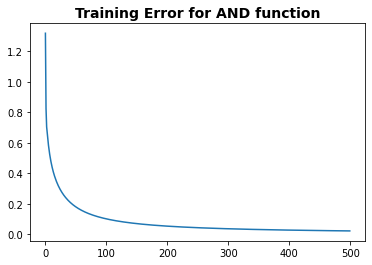


Error: 			 0.021
Epochs: 		 500
Predict: 		 [-0.9999941  -0.97472777 -0.97472777  0.96461103]
Predict Round: 		 [-1. -1. -1.  1.]
Pesos: 			 [ 4.18958785  4.18958789 -6.36983666]


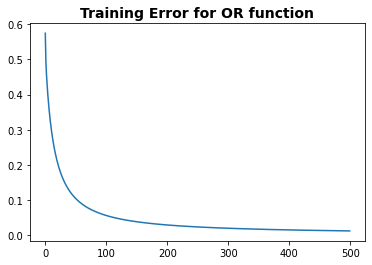


Error: 			 0.011
Epochs: 		 500
Predict: 		 [-0.97469693  0.98989038  0.98988538  0.99999934]
Predict Round: 		 [-1.  1.  1.  1.]
Pesos: 			 [ 4.82181812  4.82157042 -2.17963789]


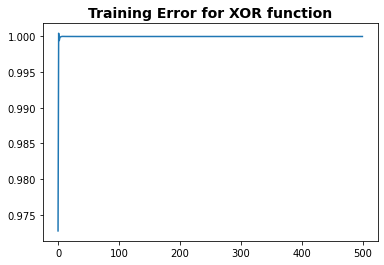


Error: 			 1.000
Epochs: 		 500
Predict: 		 [-5.55111512e-17  2.77555756e-17  2.77555756e-17  1.11022302e-16]
Predict Round: 		 [-0.  0.  0.  0.]
Pesos: 			 [ 8.32667268e-17  8.32667268e-17 -5.55111512e-17]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def train_perceptron(learn = 'AND', epochs = 500, learning_rate = 0.2, threshold = 1e-3):

  X = np.matrix([ [0,0], [1,0], [0,1], [1,1] ])
  learn_f = { 'AND':[-1, -1, -1, 1], 'OR':[-1, 1, 1, 1], 'XOR':[-1, 1, 1, -1] }
  y = np.array( learn_f[learn] )

  W = np.random.rand(3)

  y_pred = np.zeros([4])

  error_hist = []

  for epoch in range(epochs):
    for i in range(np.shape(X)[0]):
      y_pred[i] = np.tanh(W[0]*X[i,0] + W[1]*X[i,1] + W[2])

    error = 0
    for i in range(np.shape(y)[0]):
      error = error + np.abs(y[i] - y_pred[i])
    error = error / np.shape(y)[0]  #  erro médio

    error_hist.append(error)
    if error <= threshold: break 

    for i in range(np.shape(X)[0]):
      W[0] = W[0] + learning_rate * (y[i] - y_pred[i]) * X[i,0]
      W[1] = W[1] + learning_rate * (y[i] - y_pred[i]) * X[i,1]
      W[2] = W[2] + learning_rate * (y[i] - y_pred[i]) 

  return W, error_hist, y_pred


for funcao in ['AND','OR','XOR']:
  
  W, error_hist, y_pred = train_perceptron(funcao)
  # W, error_hist, y_pred = train_perceptron(funcao, 20000)

  sns.lineplot(x=range(len(error_hist)),y=error_hist)
  plt.title('Training Error for ' + funcao + ' function', fontsize=14, weight='bold' )
  plt.show()
  
  print()
  print(f'Error: \t\t\t {error_hist[len(error_hist)-1] :0.3f}')
  print(f'Epochs: \t\t {len(error_hist)}')
  print(f'Predict: \t\t {y_pred}')
  print(f'Predict Round: \t\t {np.round(y_pred)}')
  print(f'Pesos: \t\t\t {W}')



Os gráficos acima mostram a redução do erro da predição das saídas ao longo do treinamento. O erro decresce à medida que os pesos são ajustados e, como você pode ver, convergem para o aprendizado das funções AND e OR, mas não para a função XOR.

# `scikit-learn` Perceptron

Acima desenvolvemos o aprendizado do Perceptron *by scratch* (do zero). Mas talvez interesse a você empregar a classe Perceptron do pacote `scikit-Learn`. O resultado será o mesmo do modelo acima.

A classe `Perceptron` encontra-se no `scikit-learn` dentro dos Classificadores lineares (SVM, regressão logística etc.) que são treinados por métodos de gradiente descendente que você verá a seguir.

O uso da classe `Perceptron` segue de perto o esquema de muitos outros classificadores (como SVM, regressão logística e árvores de decisão). 
Podemos sumarizar esses passos em:

1. Define Model `m`
3. Train Model `m.fit(X,y)`
4. Predict Model `m.predict(X_test)`
5. Check results `m.score(X,y)`

Onde `X` e `y` são as variáveis do conjunto de treinamento e `X_test` as entradas que desejamos fazer a predição. Confortável com esse modelo? Esse esquema será bastante empregado na construção dos nossos modelos.




In [ ]:
from sklearn.linear_model import Perceptron

X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]

for f, y in { 'AND':[0, 0, 0, 1], 'OR':[0, 1, 1, 1], 'XOR':[0, 1, 1, 0] }.items():
  
  print('\n Função: ', f); print(80*'-')

  ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1234)
  print(ppn)
  ppn.fit(X, y)    
 
  y_pred = ppn.predict([[0, 0], [0, 1], [1, 0], [1, 1]])
  print(y_pred)
 
  print(ppn.score(X,y))




 Função:  AND
--------------------------------------------------------------------------------
Perceptron(eta0=0.1, max_iter=40, random_state=1234)
[0 0 0 1]
1.0

 Função:  OR
--------------------------------------------------------------------------------
Perceptron(eta0=0.1, max_iter=40, random_state=1234)
[0 1 1 1]
1.0

 Função:  XOR
--------------------------------------------------------------------------------
Perceptron(eta0=0.1, max_iter=40, random_state=1234)
[0 0 0 0]
0.5


Veja que o `score()` do modelo para a função `XOR` é, diferente das demais, de apenas 0.5, pois, não sendo a função linearmente separável, apenas metade das instâncias de treinamento puderam ser aprendidas pelo modelo linear. 

# Experimentando Redes Neurais *sem programação*

Acesse agora o site https://playground.tensorflow.org/.

Você poderá fazer uma série de ‘experimentos’ e observar o aprendizado de uma rede neural para diferentes problemas. Aqui algumas sugestões de exploração para você:

1.	Comece configurando uma rede de 1 único neurônio e solucionando um problema linearmente separável. Observe o ajuste dos pesos e a redução do erro (Test e Training Loss).
2.	Tente com o mesmo neurônio, solucionar um problema não linearmente separável. Veja que o erro não decresce e os dados não conseguem ser separados corretamente.
3.	Adicione agora uma ou duas camadas. Veja que agora um problema simples, mesmo não linear, pode ser rapidamente aprendido.
4.	Experimente outros problemas mais difíceis (menos lineares). Você verá que para problemas mais complexos como o da figura abaixo pode ser necessário um grande número de elementos e camadas.


In [ ]:
from IPython.display import IFrame
IFrame('https://playground.tensorflow.org/', width='100%', height=600, style="-webkit-transform:scale(0.1);-moz-transform-scale(0.1);")

# Multilayer Perceptron, redes multicamada

Como você viu os perceptrons podem ser conectados, a saída de um sendo a entrada de outros elementos, de modo a formar da rede neural em camadas.

As camadas externas são as camadas de entrada e saída da rede. As camadas internas são as camadas de ocultas (hidden) da rede. As redes podem ter diferentes configurações com diferentes números de entradas, saídas e número de camadas. 

>>> *As redes podem ter diferentes configurações com diferentes números de entradas, saídas e número de camadas.* 

Essas redes são conhecidas também como feed-forward ou, mais modernamente, como modelos sequenciais. As entradas são processadas em sequência, uma camada após a outra. 

O problema é que o modelo de aprendizado do perceptron não pode mais ser aplicado diretamente a uma rede multicamada. 


<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_multilayer.png" width=400, align="center">
<br>
<br>
<figcaption><b>Figura 4. Rede de Neurônicos Multicamada, MLP.</b></figcaption>
</figure>




## Backpropagation

Embora a ideia seja a mesma, o ajuste dos pesos para treinamento de uma rede multicamada difere bastante do ajuste dos pesos de um único perceptron e você deve notar que o ajuste terá magnitudes diferentes em cada camada. 

Aqui será útil empregarmos uma simplificação. Vamos supor uma rede de duas camadas definida pelas funções: 

$$ x \rightarrow  w_1 x = z \rightarrow  w_2  z^2  = y $$

Essas não são a função do perceptron, mas servem para ilustrar o procedimento. 

A primeira camada calcula  $w_1 x = z$ , e esse valor é a entrada para um novo cálculo e fornece a saída final  $w_2 z^2  = y$. É claro que ao final $y = w_2 ( w_1 x )^2$,  ou ainda $y = w_2 w_1^2 x^2$ , mas o processamento da rede é em camadas e a operação em cada uma delas, feita separadamente. Isso é importante para o ajuste dos pesos. Essas camadas e o ajustes *retropropagados* encontram-se representados abaixo.


<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_backpropagation.png" width=500, align="center">
<br>
<br>
<small>
<figcaption><b>Figura 5. Esquema do aprendizado da rede: retropropagação do erro.</b></figcaption>
</figure>


Note que o ajuste do peso em cada camada depende da derivativa do erro da camada seguinte. Assim, em uma rede multicamadas, o cálculo da saída é feito calculando-se, a partir da camada de entrada para a de saída, cada uma das camadas (feed-foward). Já o ajuste dos pesos é feito na direção contrária, a partir da derivada do erro obtido na camada de saída retropropagando o erro (alusão ao fato do erro ter se propagado no cálculo feed-forward). Esse procedimento é conhecido como backpropagation, ou algoritmo de retropropagação.

O esquema a seguir sumariza nossa abordagem das redes feedforward. 

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_backpropagation_full2.png" width=500, align="center">
<br>
<br>
<small>
<figcaption><b>Figura 6.  Esquema geral do algoritmo de retropropagação 
que minimiza o erro quadrático.
</b></figcaption>
</figure>


A implementação do algoritmo de backpropagation não é exatamente complexa, mas exige um certo esforço e a matemática por traz do algoritmo requer um certo domínio de notação para lidar com diferentes camadas. Mas o seu princípio é bastante simples e poderoso e podemos entender melhor isso explorando, sem muita perda, modelos mais simples de descida do gradiente em uma única camada.

# Aplicando o `MLPClassifier`

A mesma estrutura de código que empregamos para implementar outros estimadores supervisionados como o a Regressão Logística, o K-Vizinhos mais Próximos, Árvores de Decisão e Florestas aleatórias pode ser empregado também para o estimador Multi Layer Perceptron do `Scikit-Learn` apenas alterando o classificador. Por exemplo, abaixo, definimos uma rede neural com a função de ativação `tanh` e duas camadas ocultas de 12 neurônios cada. Mais uma vez o `random_state=1234` é empregado apenas para reprodutibilidade dos resultados uma vez que os pesos iniciais da rede são aleatórios.

In [ ]:
# you can skip this code!

def show_results(model_name=''):
  plt.figure(figsize=(6,12))
  plt.subplot(3,1,1)
  plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
  plt.title('Moons Trainning Set',weight='bold',fontsize=14)
  plt.xlabel("X1")
  plt.ylabel("X2")

  plt.subplot(3,1,2)
  plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
  plt.title('Moons Test Set',weight='bold',fontsize=14)
  plt.xlabel("X1")
  plt.ylabel("X2")

  plt.subplot(3,1,3)
  plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
  plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, s=250, alpha=0.4)

  plt.scatter(X_test[y_pred!=y_test,0], X_test[y_pred!=y_test,1], color='red', s=250, alpha=0.4, label='wrong predictions')
  plt.title('Moons ' + model_name + ' Predictions',weight='bold',fontsize=14)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.legend(loc='lower left',fontsize=12)

  plt.tight_layout()
  plt.show()



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.25, random_state=1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1234)

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(12, 12), random_state=1234)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.86
Accuracy on test set: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


E novamente podemos visualizar os resultados da classificação.

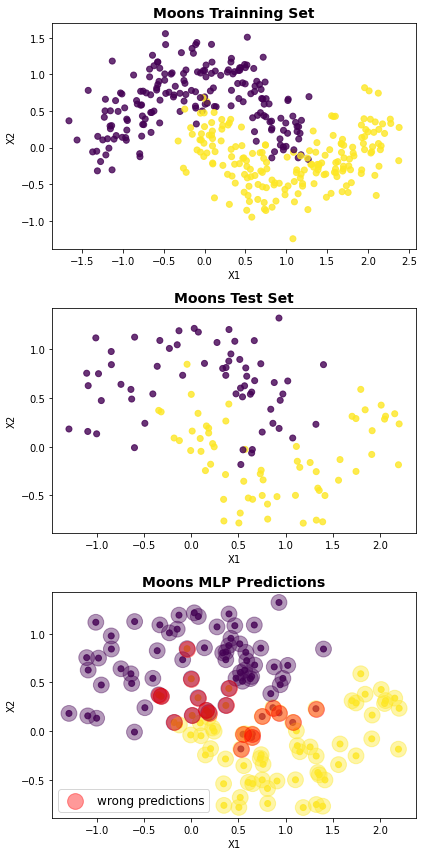

In [ ]:
show_results('MLP')

## Parâmetros do MLP

Vamos explorar alguns parâmetros do nosso classificar MLP. 

1. **hidden_layer_sizes**
Neste parâmetro você pode indicar a quantidade de neurônios nas camadas internas da rede. É uma tupla `()`, mas permite também fornecer uma lista `[]`. O tamanho da lista corresponde ao número de camadas ocultas e, cada posição, contem o número de neurônios da respectiva camada.

Note que as camadas de entrada e saída estão sempre presentes. Não é preciso informar o número de neurônios nessas camadas pois obrigatoriamente eles correspondem a dimensão de *features* (atributos) da variável preditora `X` e da variável objetivo `y`. 

2. **activation**
Aqui você pode especificar a função de ativação das camadas *internas* da rede entre **‘identity’, ‘logistic’, ‘tanh’, ‘relu’**. Por padrão  **’relu’** é função empregada nas camadas *internas*, mas ela não é adequada para camadas de saída e para as camadas de entrada e saída o `scikit_learn` atribui automaticamente a função.

3. **solver**
Define o otimizador que será empregado. O `Adam` é um otimizar publicado primeiramente em 2014 que combina uma série de técnicas e vem sendo o mais empregado como padrão, não só pelo `scikit_learn`, mas também por vários outros frameworks como o `TensorFlow` `PyTorch`. 

* ‘sgd’ refere-se ao otimizador do gradiente estocástico 
* ‘adam’ refere-se ao otimizador do gradiente estocástico proposto por Kingma, Diederik, e Jimmy Ba
* ‘lbfgs’ refere-se a uma família de otimizadores quasi-Newton.

O solucionador padrão 'adam' funciona muito bem em conjuntos de dados relativamente grandes (milhares de dados), mas para pequenos conjuntos de dados (como nossos exemplos) prefira o 'lbfgs' que deve convergir mais rapidamente e com desempenho melhor.

4. **learning_rate_init**
A taxa de aprendizado tem como padrão o valor 0.001. Ela por padrão é constante ao longo de todo o treinamento, mas isso pode ser alterado através do parâmetro `learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}` (default=’constant’).

6. **validation_fractionfloat, default=0.1**
Corresponde a porção dos dados que será empregada para validação do treinamento da rede.

Note que você já criou um conjunto de testes. A rigor, conjuntos de testes são para ser empregados após o treinamento do modelo para aferir os seus resultados. Os **conjuntos de validação**, por outro lado, são empregados durante o treinamento para ajustes dos parâmetros do modelo. Enquanto não vemos muita diferença desses conjuntos nos modelos tradicionais, os conjuntos de validação são essenciais no aprendizado de modelos neurais.

5. **max_iterint, default=200**
É o máximo número de iterações do aprendizado e corresponde ao número máximo de épocas de treinamento que será empregado. 

Há ainda o `early_stoppingbool` que define um critério de parada do treinamento baseado na taxa de aprendizado (quando o treinamento não evolui após `nr_iter_no_change`) e muitos outros parâmetros. Para nossos propósitos esses parâmetros são suficientes, mas recomendo que você pesquise outras possibilidades na documentação do `scikit-learn`. 




# Deep Learning, `Keras/TensorFlow` e `PyTorch`

Embora possamos empregar framework do `scikit-learn` para implementar modelos neurais com várias camadas, para redes neurais mais complexas e profundas o framework do `scikit-learn` é, em geral, insuficiente. Para esses modelos frameworks como `Keras/TensorFlow` e `PyTorch` implementam uma série de recursos que viabilizam modelos muito mais complexos e de milhares de elementos (neurônios). Para citar os principais:     

* **Implementação de Tensores**. Implementação eficiente para o cálculo com Tensores, esses são arrays multidimensionais à exemplo do que você encontra no Numpy. Mas os frameworks implementam seu engine próprio.

* **Processamento em GPU**. O processamento dos tensores pode ser distribuído para outros dispositivos de processamento como GPUs, TCUs (Google) etc. Isso dá grande capacidade de processamento e velocidade para os sistemas implementados.

* **Cálculo Automático de Gradiente**. Esses frameworks fornecem automaticamente o Gradiente de todas operações com tensores para que possam ser empregados no ajuste dos pesos de quaisquer arquiteturas de redes fornecendo uma forma simples e flexível de implementar diferentes arquiteturas e soluções de rede profundas adequadas a cada tipo de problema.

* **Grafos de Execução**. Todas as operações com tensores são construídas em grafos de execução, o que permite analisar e otimizar várias possibilidades de execução dos modelos como, por exemplo, paralelismo das execuções. 

Todas essas características são essenciais e em grande parte viabilizam a criação, treinamento e execução de modelos de deep learning com milhares de elementos e dados. 

 

> Em resumo esses frameworks são uma plataforma para programação diferenciável que combina habilidades de execução eficiente de operações sobre tensores em diversos dispositivos, o cálculo do gradiente de expressões diferenciáveis quaisquer e grafos e execução. 



# Implementando um modelo de Classificação com o `Keras\TensorFlow`

O `Keras` é a API de alto nível do `TensorFlow 2`: uma interface mais acessível e bastante produtiva para resolver problemas de aprendizado profundo fornece abstrações a vários blocos de construção de modelos deep learning (transformações, camadas, treinamento etc.). O `Keras` funciona, assim, como um *wrapper* para a estrutura do `TensorFlow`. 

O comparativo abaixo ajuda a entender algumas das diferenças entre o  `TensorFlow`, o `Keras` e o `PyTorch` que estudaremos mais adiante. 

|   |	Keras	| Pytorch	| TensorFlow |
|---|-------|---------|------------|
| API Level |	High	|Low	|High and Low|
| Architecture	|Simple, concise, readable|	Complex, less readable	|Not easy to use |
| Datasets	|Smaller datasets	|Large datasets, high performance|	Large datasets, high performance |
| Debugging	|Simple network, so debugging is not often needed|	Good debugging capabilities	|Difficult to conduct debugging|
| Does It Have Trained Models?	|Yes	|Yes|	Yes|
| Popularity	|Most popular	|Third most popular	|Second most popular|
| Speed	|Slow, low performance|	Fast, high-performance	|Fast, high-performance| 
| Written In	|Python	|Lua	|C++, CUDA, Python|

O Modelo Sequencial de programação do Keras/TensorFlow é o modo mais simples de construir modelos de redes em camadas e é que você aprenderá aqui e se quiser você pode consultar outras implementações em Oliveira, R. de (2021) **Deep Learning I** Disponível em: https://github.com/Rogerio-mack/Deep-Learning-I, incluindo modelos de Regressão, Multiclasse e com `PyTorch`.

# CASO: Kyphosis Diagnostic

O kyphosis dataset possui 81 casos com 4 atributos representando dados sobre crianças que passaram por cirurgia corretiva da coluna vertebral.

Fonte: https://vincentarelbundock.github.io/Rdatasets/csv/rpart/kyphosis.csv

O objetivo é prever com base nos dados os casos positivos de sifose. 

![imagem](https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Sagittal_balance.png/220px-Sagittal_balance.png)

<small>
<b> Figura 7. Sagittal balance measurement. </b><br>(Fonte: https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Sagittal_balance.png/220px-Sagittal_balance.png)

In [ ]:
#@markdown You can skip this code!

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def print_results(y_test, y_pred):
  print('\nConfusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
  print('\nClassification Report: \n\n', classification_report(y_test, y_pred))
  print('\nAccuracy Score: \n\n', accuracy_score(y_test, y_pred), '\n')
  return

def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  print('\n\nLearning Curve... \n\n')
  print('\n', history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, [history_df.columns[1], history_df.columns[3]]].plot()

  print(("\nBest Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df[history_df.columns[2]].min(), 
              history_df[history_df.columns[3]].max()))
  print('\n ')
  return

# print_results(y_test_one, y_pred_one)
# display_acc_hist(history)



## Preparação dos Dados

In [ ]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/rpart/kyphosis.csv',index_col=0)
df.head()

,Kyphosis,Age,Number,Start
1,absent,71,3,5
2,absent,158,3,14
3,present,128,4,5
4,absent,2,5,1
5,absent,1,4,15


## Encodes

O `TensorFlow` requer entradas de dados unicamente numéricas. As variáveis preditoras aqui já são numéricas, mas precisaremos fazer o encode da variável objetivo. Com trata-se de uma classificação binária, podemos empregar um encode simples, e para problemas de classificação multiclasse os frameworks requerem o hot encode da classe (diferentemente do `scikit-learn`). 

## Normalização

A normalização em geral é aplicada e torna mais fácil o aprendizado da rede.

## Separação dos Conjuntos de Treinamento e Teste

Definidos e tratados os dados de entrada `X` e saída `y` dos dados, podemos então separar os conjuntos de treinamento e teste. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.drop(columns=['Kyphosis'])
y = df[['Kyphosis']]

# One Encode
#-------------------------------------------------------------------------------

y = y.replace({'absent':0,'present':1})

# Scale
#-------------------------------------------------------------------------------

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = df.columns[1:4])   

# Show Results
#-------------------------------------------------------------------------------

print('\nEntradas para o Treinamento, X...\n')
display(X.head())
print('\nSaídas para o Treinamento, y....\n')
display(y.head())

# Conjuntos de Treinamento e Teste
#-------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


Entradas para o Treinamento, X...



,Age,Number,Start
0,0.341463,0.125,0.235294
1,0.765854,0.125,0.764706
2,0.619512,0.250,0.235294
3,0.004878,0.375,0.000000
4,0.000000,0.250,0.823529



Saídas para o Treinamento, y....



,Kyphosis
1,0
2,0
3,1
4,0
5,0


## Modelo Sequencial

Agora você está com os dados prontos para criar um modelo neural com o Keras/TensorFlow. 

A construção do modelo segue basicamente os seguintes passos:

1. Defina o modelo.
2. Compile o modelo.
3. Treine o modelo.
4. Avalie o modelo.
5. Faça Predições.

Nada muito diferente do quê você aprendeu no uso do `Scikit-learn`. 

### Imports

O `import tensorflow as tf` pode muitas vezes não ser necessário quando empregamos a interface de alto nível do Modelo Sequencial. Mas empregaremos ele mais adiante e, por isso, incluímos aqui.

In [ ]:
# imports
#-------------------------------------------------------------------------------

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

### Declarando as Camadas

As camadas são definidas são adicionadas ao Modelo Sequencial incluindo-se `layers` que são adicionados na mesma sequencia em que aparecem.

In [ ]:
# Define o Modelo
#-------------------------------------------------------------------------------

model = keras.Sequential(layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1]])) # Entrada
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='sigmoid')) # Saída

Além de neurônios do tipo Perceptron, existem camadas de vários tipos de *neurônios* como camadas de convolução (`layers.Conv1D`, `layers.Conv2D`) ou de transformação, como levar dados de uma matriz 2D para um vetor 1D (`layers.Flatten`) muito empregados em redes profundas. As camadas `Dense` correspondem às camadas que já conhecemos de neurônios de redes MLP. Nessa camada você pode configurar o número de neurônios (`units`), a função de ativação, entre outros parâmetros. A primeira camada deve incluir o tamanho da entrada dos dados, isto é o número de atributos de entrada. No nosso caso são 9 atributos, e poderíamos igualmente ter empregado `X_train.shape[1]`.

Da segunda camada em diante você não precisa especificar o tamanho da entrada. O modelo assumirá que as entradas correspondem às saídas da camada anterior. É por isso que esse modelo não permite alterar a estrutura da rede incluindo outras entradas ou produzindo outras saídas da rede. 

Para classificação binária e modelos de regressão podemos ter um único neurônio de saída. Para modelos multiclasse emprega-se um neurônio para cada classe de dados na saída. As demais camadas, entre a camada de entrada e saída, são arbitrárias.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 16)                64        
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


O método `summary` fornece então o modelo construído. 

### Compilando o Modelo

O método `compile` permite definir vários parâmetros do modelo como o otimizador a ser empregado e a função custo que será otimizada. 

Abaixo empregamos o otimizador padrão (`rmsprop`). Como função custo empregamos a Entropia Cruzada ou *Cross Entropy*, uma métrica bastante empregada como função custo para problemas de classificação. Essa é uma medida bastante mais elaborada que a acuracidade que não detalharemos aqui e você pode consultar as referências ao final deste capítulo para saber mais sobre *Cross Entropy*. O parâmetro `metrics` permite ainda indicar métricas que desejamos produzir e salvar durante o treinamento do modelo e selecionamos aqui a acuracidade. 

In [ ]:
# Compila o Modelo
#-------------------------------------------------------------------------------

model.compile(loss='binary_crossentropy',  # Multiclass loss
              optimizer='adam', 
              metrics=['binary_accuracy'])

### Treinando o Modelo

Diversos parâmetros podem ter empregados para o treinamento do modelo. O método `.fit` recebe o conjunto de treinamento com suas entradas e saídas que podem estar no formato de `DataFrame` ou `Series` dados, como também em matrizes `Numpy` ou tensores. O `Keras` se encarrega de fazer a transformação desses dados para tensores e você, neste caso, não precisa se preocupar com isso. 

O pârametro `validation_split` é empregado para definir o percentual dos dados que será empregado como conjunto de validação ao longo do treinamento que será realizado em $n$ `epochs`. 

In [ ]:
# Treina o Modelo
#-------------------------------------------------------------------------------

history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=50,
    verbose=1,  
)

Epoch 1/50
2/2 [==============================] - 1s 200ms/step - loss: 0.7057 - binary_accuracy: 0.4615 - val_loss: 0.6926 - val_binary_accuracy: 0.5882
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 0.7023 - binary_accuracy: 0.4872 - val_loss: 0.6905 - val_binary_accuracy: 0.5882
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6991 - binary_accuracy: 0.5385 - val_loss: 0.6885 - val_binary_accuracy: 0.5882
Epoch 4/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6961 - binary_accuracy: 0.5385 - val_loss: 0.6865 - val_binary_accuracy: 0.7647
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 0.6931 - binary_accuracy: 0.5385 - val_loss: 0.6846 - val_binary_accuracy: 0.7647
Epoch 6/50
2/2 [==============================] - 0s 47ms/step - loss: 0.6904 - binary_accuracy: 0.5641 - val_loss: 0.6828 - val_binary_accuracy: 0.7647
Epoch 7/50
2/2 [==============================] - 0s 31ms/step - loss: 0.6876 - b

Aqui o parâmetro `batch_size` está com o valor padrão. Ele é o número de amostras que serão feitas por atualização de gradiente. Se não for especificado, o padrão será 32 e esse parâmetro pode ter um efeito muito grande sobre o desempenho e tempo do treinamento da rede. Indique 0 no `verbose` para inibir a saída para treinamentos longos.



### Reprodutibilidade

A reprodutibilidade no caso do `Keras TensorFlow`, sendo uma API e de alto nível é bastante difícil de ser alcançada e você pode ver o grande número de fóruns sobre isso na internet. Você pode testar e estratégias de *setar* do `Python`, do `Numpy` e mesmo do backend do `TensorFlow` não terão resultado aqui. Os modelos de redes profundas são naturalmente estocásticos e o fato de termos processos em paralelo (mesmo em CPUs) e ainda em GPUs dificulta ainda mais isso. Não vamos, portanto, nos preocupar com isso aqui. Os resultados do treinamento acima, portanto, devem diferir do que apresentamos aqui se você executa-los. 

### Avaliação

Você deve ter notado que fizemos uma atribuição do método `fit` para uma variável `history` acima. Isso é opcional. Se fizer, o histórico do treinamento com os valores da função de perda e das métricas selecionadas na compilação do modelo serão armazenadas a cada passo do treinamento. Podemos então construir um `DataFrame` a partir desses dados e exibir a curva de aprendizado. Essa curva fornece um instrumento muito útil para a análise do treinamento da rede e o ajuste de seus hiperparâmetros. 

Podemos então avaliar os resultados do nosso modelo fazendo a predição do conjunto de teste selecionado anteriormente. 

Aqui podemos empregar as métricas usuais do `Scikit-Learn`. A predição, tendo um único neurônio de saída com a função sigmóide (ou logística) devolve um único valor entre $[0, 1]$ e podemos entender esse valor como a chance de ser a classe `1`.


Confusion Matrix: 

 [[25]]

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


Accuracy Score: 

 1.0 



Learning Curve... 



        loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.705671         0.461538  0.692637             0.588235
1  0.702282         0.487179  0.690492             0.588235
2  0.699084         0.538462  0.688457             0.588235
3  0.696126         0.538462  0.686519             0.764706
4  0.693116         0.538462  0.684649             0.764706

Best Validation Loss: 0.6072
Best Validation Accuracy: 0.7647

 


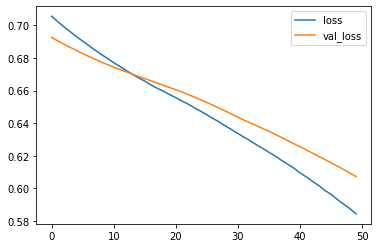

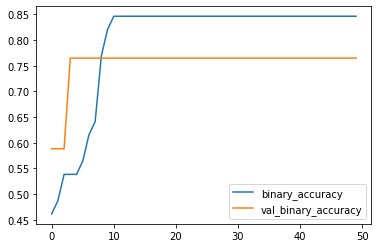

In [ ]:
# Avalia o Modelo
#-------------------------------------------------------------------------------
y_pred_one = np.argmax(model.predict(X_test), axis=1)
y_test_one = np.argmax(np.array(y_test), axis=1)

print_results(y_test_one, y_pred_one)
display_acc_hist(history)

# Síntese

Nesta trilha você pôde conhecer os principais conceitos dos modelos neurais e de como evoluíram esses modelos, desde o neurônio perceptron até as redes neurais profundas de hoje. 

Aqui você também aprendeu como criar em empregar modelos MLP Multilayer Perceptron com `sci-kit learn` para problemas de aprendizado supervisionado de classificação. Embora útil, os modelos neurais que podemos implementar com o  `sci-kit learn` são bastante limitados. Redes neurais mais complexas e profundas requerem o uso de frameworks como Keras/TensorFlow e PyTorch que implementam plataforma para programação diferenciável com operações eficientes de tensores em diversos dispositivos como GPUs, o cálculo automático de gradientes e grafos e execução para otimização. 

Você pode, então, aplicar um modelo de classificação sequencial simples com o Keras/TensorFlow empregando uma sequência de passos bastante padrão para o aprendizado supervisionado à exemplo do que viu no uso do `Scikit-learn`. 





# Para saber mais

* Acesse o site do `scikit-learn` em https://scikit-learn.org/stable/modules/neural_networks_supervised.html e explore os exemplos de modelos supervisionados e as funções do classificador MLP. 

* Para o uso do Keras você pode acessar a documentação oficial em https://keras.io/api/models/, **Models API**, e explorar exemplos dos diferentes modos de construção de redes profundas com o Keras TensorFlow. Ou pode ainda acessar **3 ways to create a Machine Learning model with Keras and TensorFlow 2.0 (Sequential, Functional, and Model Subclassing)**, em https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3.

* Acesse **The Neural Network Zoo** em https://www.asimovinstitute.org/neural-network-zoo/ e explore as diferentes diferentes arquiteturas de rede apresentadas.

* Acesse **Deep Learning 101 - Part 1: History and Background** em 
https://www.programmersought.com/article/54453361399/ e conheça um pouco de como evoluíram os modelos neurais.

* Quer entender melhor o que é Cross Entropy? Então acesse o artigo **Cross-Entropy Demystified**, em https://naokishibuya.medium.com/demystifying-cross-entropy-e80e3ad54a8.

Além é claro, não deixe de acessar https://playground.tensorflow.org/ e experimentar os modelos neurais.

# Referências

Ian Goodfellow and Yoshua Bengio and Aaron Courville, **Deep Learning**. MIT Press (2016). Also available online: http://www.deeplearningbook.org. 

Aston Zhang and Zachary C. Lipton and Mu Li and Alexander J. Smola. **Dive into Deep Learning** (2020). Disponível em: https://d2l.ai/index.html Acesso em: 21 de abril de 2021.

Oliveira, R. de. **Deep Learning I** Disponível em: https://github.com/Rogerio-mack/Deep-Learning-I  Acesso em: 16 de novembro de 2021.

Nielsen, M. **Neural Networks and Deep Learning**. Disponível em: http://neuralnetworksanddeeplearning.com/ Acesso em: 21 de abril de 2021.

Fridman, L. **MIT Deep Learning Basics: Introduction and Overview with TensorFlow**. Disponível em: https://blog.tensorflow.org/2019/02/mit-deep-learning-basics-introduction-tensorflow.html Acesso em: 21 de abril de 2021.

Kelleher, J. D. **Deep Learning** (2018) The MIT Press.

Skansi, S. **Introduction Deep Learning** (2018) Springer.

Géron, A. **Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems**, 2nd ed. (2019) O'Reilly

Beam, A. **Deep Learning for Medical Data**, Disponível em: https://slides.com/beamandrew/hms-computational-medicine-lecture-march-2020 Acesso em: 16 de novembro de 2021.

___. **Deep Learning Book**. Disponível em:https://www.deeplearningbook.com.br/ Acesso em: 21 de abril de 2021.

___. **UFLDL Deep Learning Tutorial**. Disponível em: http://ufldl.stanford.edu/tutorial/ Acesso em: 21 de abril de 2021.

___.**Keras Models API**. Disponível em: https://keras.io/api/models/, Acesso em: 29 de maio de 2021.

___.**Keras Layers API**. Disponível em: https://keras.io/api/layers/, Acesso em: 29 de maio de 2021.

___. **Deep Learning 101 - Part 1: History and Background** Disponível em:
https://www.programmersought.com/article/54453361399/ Acesso em: 21 de abril de 2021.

___. **A Concise History of Neural Networks**. Disponível em:
https://towardsdatascience.com/a-concise-history-of-neural-networks-2070655d3fec#.alhfvwwl2 Acesso em: 21 de abril de 2021.